In [ ]:
pip install xlrd==1.2.0 ### ######

     |████████████████████████████████| 103 kB 34.2 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [ ]:
pip install xlsxwriter

     |████████████████████████████████| 149 kB 34.7 MB/s 


In [ ]:
name_file = "CNN_dataset_2"

In [ ]:
from sklearn import metrics , cross_decomposition, model_selection
from sklearn.model_selection import cross_validate
from scipy.signal import savgol_filter
import pandas as pd
import numpy as np
import xlrd
import xlsxwriter
from sklearn.preprocessing import StandardScaler, MinMaxScaler #for calculate SNV
import time
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler ## for calculate SNV
from sklearn.model_selection import train_test_split as split
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut 
from sys import stdout
import re
from keras.layers.advanced_activations import LeakyReLU
from sklearn.model_selection import train_test_split   
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from keras.layers import Input
from keras.utils import np_utils

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ write name of output file name 
time1=time.time()

# ================= import data
workbook = xlrd.open_workbook("/content/IG-Dataset18_11.xlsx","rb")
sheets = workbook.sheet_names()
sheet_num=1  ## add sheet number # 5
sh = workbook.sheet_by_name(sheets[(sheet_num)-1])
n_cols=0 ##number of colum you have to delet from the front
n_rows=0 ##number of rows you have to delet from the front 
m_cols=0 ## number of colum you have to delet from the end
m_rows=0 ## number of rows you have to delet from the end
M_rows=sh.nrows-m_rows
M_cols=sh.ncols-m_cols
required_data = []
for rownum in range(n_rows,M_rows):
    row_valaues = sh.row_values(rownum)
    required_data.append(row_valaues[n_cols:M_cols])
Required_data=np.asarray(required_data)
X=Required_data[1:257674,0:16].astype(float)  #  25194 # 82334  ( 4:41 & 1:40)
X= np.array (X)

Y=Required_data[1:257674,17:18].astype(float).ravel()    # (42:43  & 41:42)
print(X.shape)

bands = Required_data[0:1, 0:16]      # ( 4:41 & 1:40)
bands= np.array (bands)
#===============
X_train, X_test, y_train, y_test = split(X, Y, test_size=(0.20), random_state=0)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
# ==============================================

nb_classes = len (np.unique( y_train ))
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

X_train = X_train.reshape(X_train.shape[0], 1, 16, 1)   #Reshape for lstm - should work!!
X_test= X_test.reshape(X_test.shape[0], 1, 16, 1)

print('class', nb_classes)

(257673, 16)
class 2


In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
from keras.utils import np_utils
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, Flatten, MaxPooling2D,BatchNormalization
from keras.layers import LSTM,TimeDistributed,Conv1D,MaxPooling1D
from keras.layers import Dense, Dropout, Flatten
from keras import models
from keras import layers
from keras.models import Model

CNN_model = Sequential()
CNN_model.add(Conv2D(512, kernel_size=(3, 3),activation='tanh',padding='same',input_shape=(1,16,1)))
CNN_model.add(BatchNormalization())
CNN_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
CNN_model.add(Conv2D(256, (3, 3), activation='tanh',padding='same'))
CNN_model.add(BatchNormalization())
CNN_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
CNN_model.add(Conv2D(128, (3, 3), activation='tanh',padding='same'))
CNN_model.add(Conv2D(128, (3, 3), activation='tanh',padding='same'))
CNN_model.add(BatchNormalization())
CNN_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
CNN_model.add(Conv2D(64, (3, 3), activation='tanh',padding='same')) #~~~~~~~~~~~   512
CNN_model.add(Conv2D(64, (3, 3), activation='tanh',padding='same')) #~~~~~~~~~~~   512
CNN_model.add(Conv2D(64, (3, 3), activation='tanh',padding='same')) #~~~~~~~~~~~   512
CNN_model.add(BatchNormalization())
CNN_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
CNN_model.add(Flatten())
CNN_model.add(Dense(nb_classes, activation='softmax'))

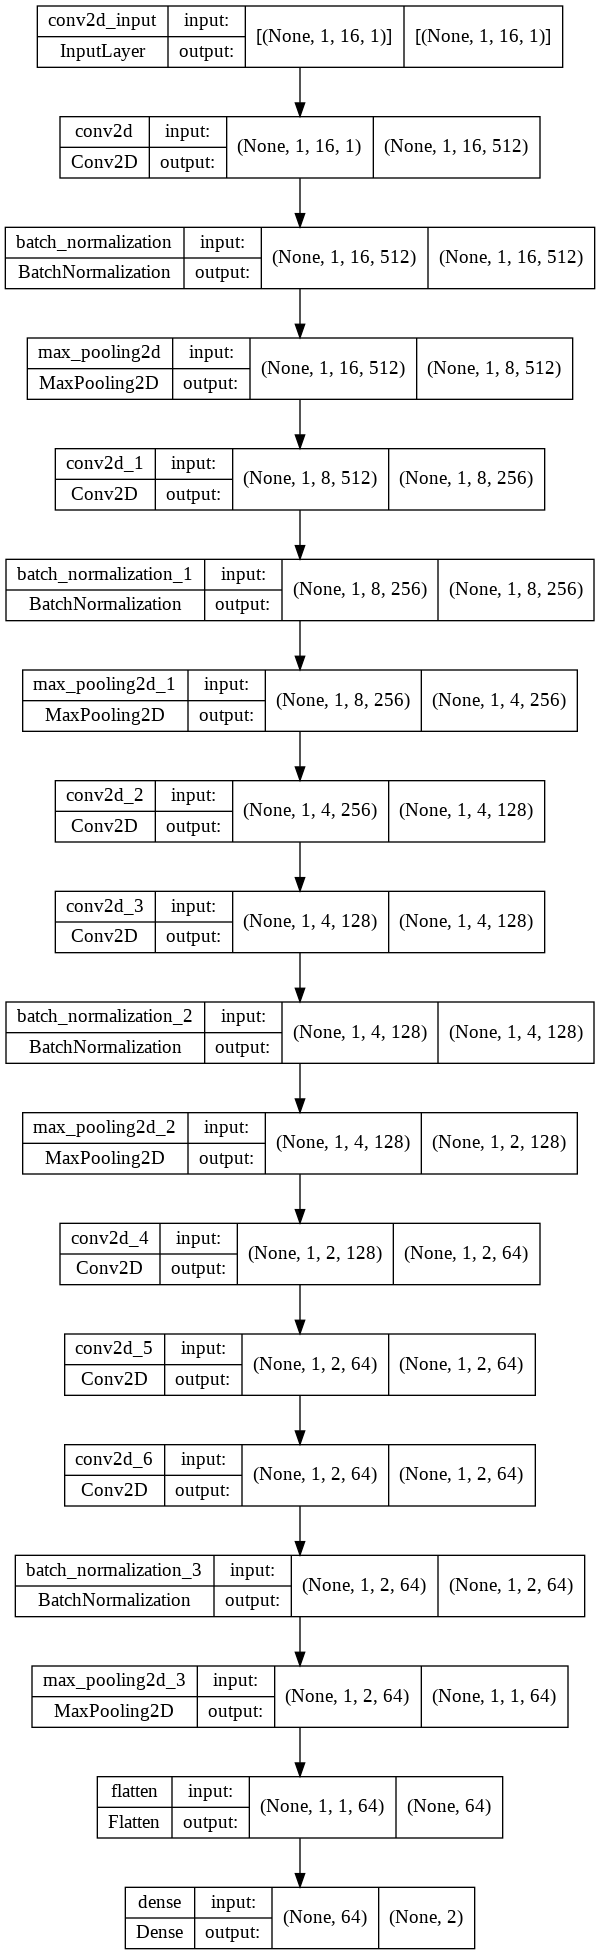

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(CNN_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import CSVLogger

CNN_model.compile(loss=keras.losses.binary_crossentropy,optimizer='Adamax',metrics=['accuracy'])  

csv_logger = CSVLogger('training.log', separator=',', append=False)
mc = ModelCheckpoint(name_file +'.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
cnn11 = CNN_model.fit(X_train,Y_train, batch_size=300, epochs=500, validation_data=(X_test ,Y_test), callbacks=[mc,csv_logger])
print (("Training time=", time.time()-time1))
np.save("CNN_data_2_@history", cnn11.history)

Epoch 1/500
688/688 [==============================] - ETA: 0s - loss: 0.2629 - accuracy: 0.8756
Epoch 1: val_loss improved from inf to 0.22948, saving model to CNN_dataset_2.h5
688/688 [==============================] - 24s 17ms/step - loss: 0.2629 - accuracy: 0.8756 - val_loss: 0.2295 - val_accuracy: 0.8940
Epoch 2/500
685/688 [============================>.] - ETA: 0s - loss: 0.2010 - accuracy: 0.9032
Epoch 2: val_loss did not improve from 0.22948
688/688 [==============================] - 10s 15ms/step - loss: 0.2010 - accuracy: 0.9032 - val_loss: 0.3702 - val_accuracy: 0.7657
Epoch 3/500
685/688 [============================>.] - ETA: 0s - loss: 0.1820 - accuracy: 0.9104
Epoch 3: val_loss did not improve from 0.22948
688/688 [==============================] - 10s 15ms/step - loss: 0.1820 - accuracy: 0.9104 - val_loss: 0.2709 - val_accuracy: 0.8499
Epoch 4/500
687/688 [============================>.] - ETA: 0s - loss: 0.1690 - accuracy: 0.9168
Epoch 4: val_loss improved from 0.2294

In [ ]:
###################### 2
from contextlib import redirect_stdout
with open('./'+name_file+".xls", 'w') as f:
    with redirect_stdout(f):
        CNN_model.summary()

In [ ]:
import pandas as pd
log_data = pd.read_csv('./training.log', sep=',', engine='python')
#print (log_data)
CNN =log_data

In [ ]:
print (name_file)

CNN_dataset_2


In [ ]:
import numpy as np
CNN11_history_11=np.load('./CNN_data_2_@history.npy',allow_pickle='TRUE').item()

In [ ]:
from keras.models import load_model
####################### 1
name_file11 = './CNN_dataset_2.h5' 
fashion_model = load_model(name_file11) # load model
fashion_model.summary() # summarize model.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1, 16, 512)        5120      
                                                                 
 batch_normalization (BatchN  (None, 1, 16, 512)       2048      
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 1, 8, 512)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 1, 8, 256)         1179904   
                                                                 
 batch_normalization_1 (Batc  (None, 1, 8, 256)        1024      
 hNormalization)                                                 
                                                        

In [ ]:
val_loss, val_accuracy=fashion_model.evaluate(X_test ,Y_test) ## to get test accuracy and losses
print(val_loss, val_accuracy)

1611/1611 [==============================] - 5s 3ms/step - loss: 0.1173 - accuracy: 0.9421
0.11730685085058212 0.9421364068984985


In [ ]:

time2=time.time()
predict_prob=fashion_model.predict(X_test)
y_pred=np.argmax(predict_prob,axis=1)
print ('classification time:', time.time()-time2)

##print (y_pred)
y_true=np.argmax(Y_test, axis=1)
from sklearn.metrics import precision_recall_fscore_support as score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
CM = confusion_matrix(y_true, y_pred)
print (CM)
print(classification_report(y_true, y_pred))

precision = precision_score(y_test, y_pred, average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred, average='weighted')
print('Recall: %f' % recall)
# f1: tp / (tp + fp + fn)
f1 = f1_score(y_test, y_pred, average='weighted')
print('F1 score: %f' % f1)
#-----------  IoU
from sklearn.metrics import jaccard_score
print ('IoU:', jaccard_score(y_true, y_pred, average='micro'))


test_eval = fashion_model.evaluate(X_test, Y_test)

loss, accuracy = fashion_model.evaluate(X_train, Y_train)
print('loss_train: ', loss, 'accuracy_train: ', accuracy)
print('Test loss:', test_eval[0], 'Test accuracy:', test_eval[1])

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
#================ classification metrics
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print ('TPR',TPR)   
# Specificity or true negative rate
TNR = TN/(TN+FP) 
print('TNR',TNR)
# Precision or positive predictive value
PPV = TP/(TP+FN)
print ('PPV', PPV)
# Negative predictive value
NPV = TN/(TN+FN)
print('NPV', NPV)
# Fall out or false positive rate
FPR = FP/(FP+TN)
print('FPR',FPR)
# False negative rate
FNR = FN/(TP+FN)
print ('FNR',FNR)  
# False discovery rate
FDR = FP/(TP+FP)
print ('FDR',FDR)    
# Overall accuracy   
ACC = (TP+TN)/(TP+FP+FN+TN)
print ('ACC',ACC)

classification time: 2.839247465133667
[[17072  1564]
 [ 1418 31481]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92     18636
           1       0.95      0.96      0.95     32899

    accuracy                           0.94     51535
   macro avg       0.94      0.94      0.94     51535
weighted avg       0.94      0.94      0.94     51535

Precision: 0.942053
Recall: 0.942136
F1 score: 0.942087
IoU: 0.8906029311957738
6442/6442 [==============================] - 18s 3ms/step - loss: 0.1098 - accuracy: 0.9459
loss_train:  0.1098375990986824 accuracy_train:  0.9458615183830261
Test loss: 0.11730685085058212 Test accuracy: 0.9421364068984985
TPR 0.9568983859691784
TNR 0.9160764112470487
PPV 0.9568983859691784
NPV 0.9233098972417523
FPR 0.08392358875295128
FNR 0.043101614030821606
FDR 0.04732939930397942
ACC 0.9421364121470845


In [ ]:
history_dict = CNN11_history_11 

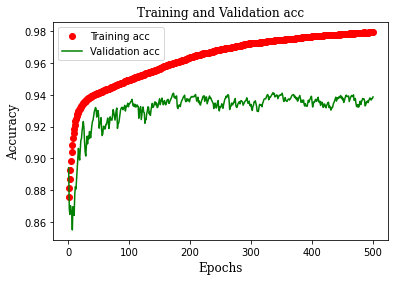

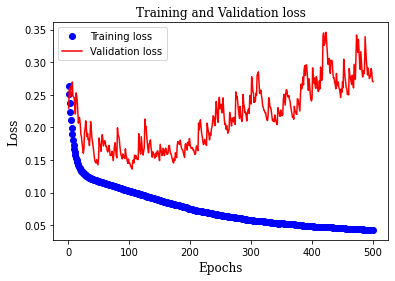

In [ ]:
#history_dict=cnn11.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
acc_values=history_dict['accuracy']
val_acc_values=history_dict['val_accuracy']
epochs=range(1, len(acc_values)+1)
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
loss_values=smooth_curve(loss_values)
val_loss_values=smooth_curve(val_loss_values)
acc_values=smooth_curve(acc_values)
val_acc_values=smooth_curve(val_acc_values)

font = {'family' : 'serif',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 12}
        

plt.plot(epochs, acc_values, 'ro', label='Training acc')
plt.plot(epochs, val_acc_values, 'g', label='Validation acc')
plt.title('Training and Validation acc', fontdict=font)
plt.xlabel('Epochs', fontdict=font)
plt.ylabel('Accuracy', fontdict=font)
plt.legend()
plt.savefig("accuracy"+name_file+".png")
plt.show()

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and Validation loss', fontdict=font)
plt.xlabel('Epochs',fontdict=font)
plt.ylabel('Loss',fontdict=font)
plt.legend()
plt.savefig("loss"+name_file+".png")
plt.show()


Confusion matrix, without normalization


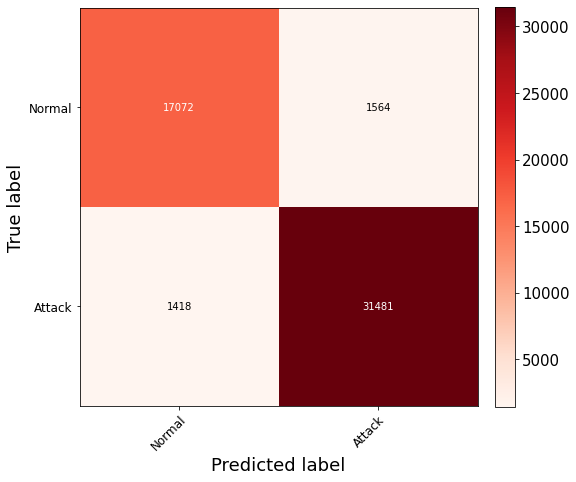

Normalized confusion matrix


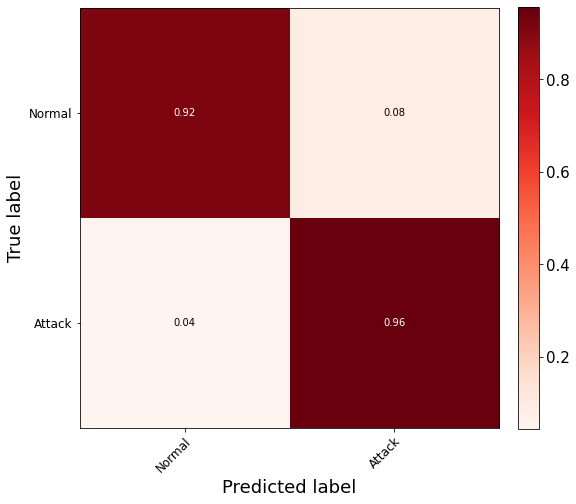

In [ ]:
class_names = ['Normal','Attack']


def plot_confusion_matrix(y_true, y_pred, classes,normalize=False,title=None, cmap=plt.cm.Reds):
                                              
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = None    ### 'Normalized confusion matrix'
        else:
            title = None        ### 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
#    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots(figsize=(8,8))
    ax.tick_params(labelsize=12)       #7777777777777777777777777777777777777777777777777777
    cmap=plt.cm.Reds                      #  cmap=plt.cm.Blues
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    cbar = ax.figure.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    for t in cbar.ax.get_yticklabels():
        t.set_fontsize(15)
    
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")
             
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

font = {'family' : 'Times New Roman',
        'color'  : 'black',
        'weight' : 'bold',
        'size'   : 15}

np.set_printoptions(precision=2) ########################## 2

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,title= None)             
plt.xlabel('Predicted label', fontsize=18)
plt.ylabel('True label', fontsize=18)
plt.savefig('confusion matrix_1_'+name_file+'.png')
plt.show()

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,title=None)            
plt.xlabel('Predicted label', fontsize=18)
plt.ylabel('True label', fontsize=18)
plt.savefig('confusion matrix_2_'+name_file+'.png')
plt.show()

In [ ]:
from IPython.display import FileLink
FileLink(r'./LSTM_dataset_2.h5') #=======================

/content/LSTM_dataset_2.h5